<a href="https://colab.research.google.com/github/AzlinRusnan/Sleep_Quality_Analysis/blob/main/Sleep_Duration_vs_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Description**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

file_path = '/content/gdrive/MyDrive/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

In [32]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


##### **Columns Explanation:**

1. Person ID: An identifier for each individual.
2. Gender: The gender of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

##### **Details about Sleep Disorder Column:**

1. None: The individual does not exhibit any specific sleep disorder.
2. Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
3. Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

##### **Checking the Columns Names**

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

##### **Checking the Total Number of Missing Values**

In [33]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


**Note:**
The **Sleep Disorder** variable has incorrectly captured 219 missing values. In the raw data, these missing values are labeled as 'None'. To fix this, we replace "NaN" with "None".

In [34]:
df['Sleep Disorder'].fillna("None",inplace=True)

print(df['Sleep Disorder'].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [35]:
# Total No. of Missing Values after NaN replacement
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values after NaN replacement"})

,Total No. of Missing Values after NaN replacement
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


##### **Standardize BMI Category**

To standardize the "BMI Category" so that both "Normal" and "Normal Weight" are categorized as "Normal,".

In [36]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight','Normal')

##### **Splitting Blood Pressure to Two Columns**

I'm splitting the Blood Pressure to two columns as i dont see any significant if we have so many columns of different Blood Pressure readings.

In [37]:
if 'Blood Pressure' in df.columns:
    # Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic' by splitting on the '/'
    df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

    # Convert the new columns to numeric type for analysis
    df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
    df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

    # Drop the original 'Blood Pressure' column now that we have numerical representations
    data = df.drop(columns=['Blood Pressure'])

data[['Systolic', 'Diastolic']].head()


,Systolic,Diastolic
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90


In [38]:
# Drop unnecessary columns and encode categorical variables
data_new = data.drop(columns=['Person ID'])
data_new = pd.get_dummies(data_new, drop_first=True)

# Convert all boolean columns to integer (1 for True, 0 for False)
data_new = data_new.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)


data_new

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Male,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,126,83,1,...,0,0,0,0,1,0,0,1,1,0
1,28,6.2,6,60,8,75,10000,125,80,1,...,0,0,0,0,0,0,0,0,1,0
2,28,6.2,6,60,8,75,10000,125,80,1,...,0,0,0,0,0,0,0,0,1,0
3,28,5.9,4,30,8,85,3000,140,90,1,...,0,1,0,0,0,0,1,0,0,1
4,28,5.9,4,30,8,85,3000,140,90,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,140,95,0,...,1,0,0,0,0,0,0,1,0,1
370,59,8.0,9,75,3,68,7000,140,95,0,...,1,0,0,0,0,0,0,1,0,1
371,59,8.1,9,75,3,68,7000,140,95,0,...,1,0,0,0,0,0,0,1,0,1
372,59,8.1,9,75,3,68,7000,140,95,0,...,1,0,0,0,0,0,0,1,0,1


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate','Daily Steps','Systolic','Diastolic']

data_new[num_vars] = scaler.fit_transform(data_new[num_vars])

data_new.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Male,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,0.00000,0.111111,0.4,0.2,0.6,0.571429,0.171429,0.407407,0.40,1,...,0,0,0,0,1,0,0,1,1,0
1,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,0.370370,0.25,1,...,0,0,0,0,0,0,0,0,1,0
2,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,0.370370,0.25,1,...,0,0,0,0,0,0,0,0,1,0
3,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000,0.925926,0.75,1,...,0,1,0,0,0,0,1,0,0,1
4,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000,0.925926,0.75,1,...,0,1,0,0,0,0,1,0,0,1


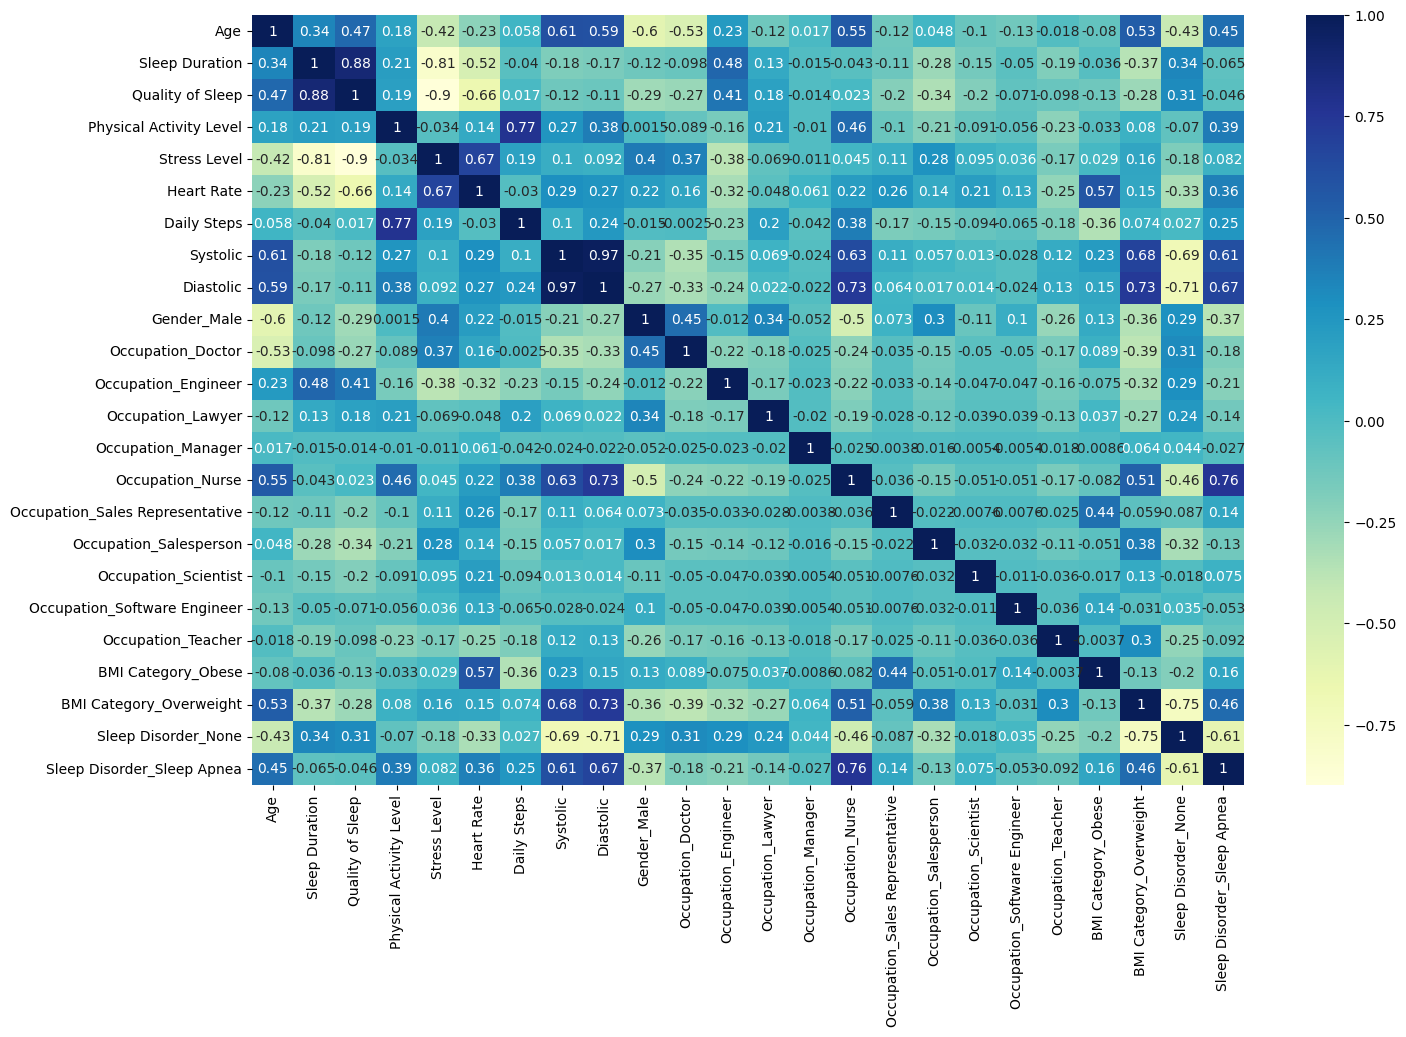

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### **Target Variable**

The target variable (dependent variable) should be continuous, so I chose Sleep Duration over Quality of Sleep as the target. This is because Quality of Sleep is rated on a 1–10 discrete ordinal scale, which may be better suited for ordinal regression.

## **The Models**

### **Multiple Linear Regression Model**

As per the purpose of the learning, I have used different approaches to build an MLR model.

1. First, I will perform MLR using the statsmodels OLS model.
2. Second, I will perform MLR using sklearn's LinearRegression model.
3. Then, I will compare the results of the two approaches.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [41]:
X = data_new.drop(columns=['Quality of Sleep'])
y = data_new['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_ols = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_ols).fit()

# Display the summary of the OLS model, including coefficients, p-values, and other statistics
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     445.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.15e-243
Time:                        23:00:35   Log-Likelihood:                 642.11
No. Observations:                 374   AIC:                            -1236.
Df Residuals:                     350   BIC:                            -1142.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.6623      0.023     29.381      0.000       0.618       0.707
Age                                 0.3817      0.033     11.664      0.000       0.317       0.446
Sleep Duration                      0.1318      0.026      5.144      0.000       0.081       0.182
Physical Activity Level            -0.0135      0.018     -0.750      0.453      -0.049       0.022
Stress Level                       -0.3723      0.026    -14.533      0.000      -0.423      -0.322
Heart Rate                         -0.1100      0.039     -2.815      0.005      -0.187      -0.033
Daily Steps                         0.0469      0.029      1.606      0.109      -0.011       0.104
Systolic                           -0.0063      0.085     -0.074      0.941      -0.174       0.161
Diastolic                          -0.0414      0.084     -0.491      0.624      -0.207       0.124
Gender_Male                         0.1192      0.014      8.391      0.000       0.091       0.147
Occupation_Doctor                  -0.1104      0.017     -6.587      0.000      -0.143      -0.077
Occupation_Engineer                -0.1380      0.016     -8.577      0.000      -0.170      -0.106
Occupation_Lawyer                  -0.0835      0.019     -4.381      0.000      -0.121      -0.046
Occupation_Manager                 -0.0780      0.048     -1.637      0.103      -0.172       0.016
Occupation_Nurse                   -0.0611      0.020     -3.069      0.002      -0.100      -0.022
Occupation_Sales Representative    -0.3123      0.042     -7.373      0.000      -0.396      -0.229
Occupation_Salesperson             -0.1793      0.018     -9.696      0.000      -0.216      -0.143
Occupation_Scientist               -0.1246      0.031     -4.055      0.000      -0.185      -0.064
Occupation_Software Engineer       -0.1015      0.027     -3.709      0.000      -0.155      -0.048
Occupation_Teacher                 -0.1033      0.015     -6.816      0.000      -0.133      -0.074
BMI Category_Obese                 -0.0197      0.036     -0.549      0.583      -0.090       0.051
BMI Category_Overweight            -0.0911      0.018     -5.169      0.000      -0.126      -0.056
Sleep Disorder_None                 0.0454      0.011      4.235      0.000       0.024       0.067
Sleep Disorder_Sleep Apnea          0.0477      0.012      4.039      0.000       0.024       0.071
==============================================================================
Omnibus:                       78.359   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.074
Skew:                          -0.550   Prob(JB):                    5.36e-161
Kurtosis:                       9.794   Cond. No.                  

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Systolic,397.83
7,Diastolic,382.52
0,Age,65.37
5,Daily Steps,41.29
3,Stress Level,38.24
1,Sleep Duration,26.48
4,Heart Rate,25.17
20,BMI Category_Overweight,23.47
8,Gender_Male,20.02
2,Physical Activity Level,17.76


In [44]:
# Step 1: Drop 'Systolic' and 'Diastolic' columns and create the first model
X_train = X_train.drop(['Systolic', 'Diastolic'], axis=1)
X_train_lm1 = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm1).fit()

print("Model without 'Systolic', 'Diastolic':\n", lr_2.summary())

Model without 'Systolic', 'Diastolic':
                             OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     355.5
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          9.28e-187
Time:                        23:00:47   Log-Likelihood:                 505.04
No. Observations:                 299   AIC:                            -966.1
Df Residuals:                     277   BIC:                            -884.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [45]:
# Calculate the VIFs again for the new model

# Calculate the VIFs for the updated X_train after dropping 'Systolic', 'Diastolic'
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'Systolic', 'Diastolic':\n", vif)

VIF after dropping 'Systolic', 'Diastolic':
                            Features    VIF
0                               Age  36.66
3                      Stress Level  35.99
5                       Daily Steps  33.89
4                        Heart Rate  24.51
1                    Sleep Duration  24.05
6                       Gender_Male  17.63
2           Physical Activity Level  17.29
18          BMI Category_Overweight  15.58
19              Sleep Disorder_None   9.44
7                 Occupation_Doctor   7.71
8               Occupation_Engineer   7.18
11                 Occupation_Nurse   6.83
9                 Occupation_Lawyer   6.03
20       Sleep Disorder_Sleep Apnea   5.58
17               BMI Category_Obese   5.47
13           Occupation_Salesperson   4.73
16               Occupation_Teacher   2.86
14             Occupation_Scientist   1.74
12  Occupation_Sales Representative   1.55
15     Occupation_Software Engineer   1.30
10               Occupation_Manager   1.14


In [46]:
# Step 2: Drop 'Physical Activity Level' and create the second model
X_train = X_train.drop('Physical Activity Level', axis=1)
X_train_lm2 = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm2).fit()
print("\nModel without 'Physical Activity Level':\n", lr_3.summary())


Model without 'Physical Activity Level':
                             OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     374.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          5.72e-188
Time:                        23:00:53   Log-Likelihood:                 504.83
No. Observations:                 299   AIC:                            -967.7
Df Residuals:                     278   BIC:                            -890.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [47]:
# Calculate the VIFs for the updated X_train after dropping 'Physical Activity Level'
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'Physical Activity Level':\n", vif)

VIF after dropping 'Physical Activity Level':
                            Features    VIF
0                               Age  36.66
2                      Stress Level  31.54
1                    Sleep Duration  23.91
3                        Heart Rate  22.33
17          BMI Category_Overweight  15.58
5                       Gender_Male  15.16
4                       Daily Steps  12.95
18              Sleep Disorder_None   9.00
6                 Occupation_Doctor   7.16
7               Occupation_Engineer   6.77
10                 Occupation_Nurse   6.76
8                 Occupation_Lawyer   5.67
19       Sleep Disorder_Sleep Apnea   5.51
16               BMI Category_Obese   5.47
12           Occupation_Salesperson   4.23
15               Occupation_Teacher   2.74
13             Occupation_Scientist   1.73
11  Occupation_Sales Representative   1.53
14     Occupation_Software Engineer   1.22
9                Occupation_Manager   1.14


In [48]:
# Step 3: Drop 'BMI Category_Obese' and create the second model
X_train = X_train.drop('BMI Category_Obese', axis=1)
X_train_lm3 = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm3).fit()
print("\nModel without 'BMI Category_Obese':\n", lr_4.summary())


Model without 'BMI Category_Obese':
                             OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     395.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.92e-189
Time:                        23:00:59   Log-Likelihood:                 504.80
No. Observations:                 299   AIC:                            -969.6
Df Residuals:                     279   BIC:                            -895.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [49]:
# Calculate the VIFs for the updated X_train after dropping 'BMI Category_Obese'
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'BMI Category_Obese':\n", vif)

VIF after dropping 'BMI Category_Obese':
                            Features    VIF
0                               Age  25.79
1                    Sleep Duration  19.63
2                      Stress Level  18.85
5                       Gender_Male  13.40
4                       Daily Steps  12.95
16          BMI Category_Overweight  12.87
17              Sleep Disorder_None   8.76
3                        Heart Rate   8.57
6                 Occupation_Doctor   6.95
10                 Occupation_Nurse   6.64
7               Occupation_Engineer   6.53
8                 Occupation_Lawyer   5.52
18       Sleep Disorder_Sleep Apnea   5.40
12           Occupation_Salesperson   4.20
15               Occupation_Teacher   2.47
13             Occupation_Scientist   1.73
14     Occupation_Software Engineer   1.21
11  Occupation_Sales Representative   1.20
9                Occupation_Manager   1.13


In [50]:
# Step 4: Drop 'Daily Steps' and create the second model
X_train = X_train.drop('Daily Steps', axis=1)
X_train_lm4 = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm4).fit()
print("\nModel without 'Daily Steps':\n", lr_5.summary())


Model without 'Daily Steps':
                             OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     416.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.59e-190
Time:                        23:01:06   Log-Likelihood:                 504.15
No. Observations:                 299   AIC:                            -970.3
Df Residuals:                     280   BIC:                            -900.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [51]:
# Calculate the VIFs for the updated X_train after dropping 'Daily Steps'
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'Daily Steps':\n", vif)

VIF after dropping 'Daily Steps':
                            Features    VIF
0                               Age  25.52
1                    Sleep Duration  17.60
2                      Stress Level  13.32
4                       Gender_Male  13.03
15          BMI Category_Overweight  12.85
16              Sleep Disorder_None   8.18
3                        Heart Rate   7.69
9                  Occupation_Nurse   6.58
5                 Occupation_Doctor   6.45
6               Occupation_Engineer   6.02
7                 Occupation_Lawyer   5.48
17       Sleep Disorder_Sleep Apnea   5.15
11           Occupation_Salesperson   4.05
14               Occupation_Teacher   2.47
12             Occupation_Scientist   1.72
13     Occupation_Software Engineer   1.21
10  Occupation_Sales Representative   1.16
8                Occupation_Manager   1.13


In [52]:
# Step 5: Drop 'Occupation_Software Engineer' and create the second model
X_train = X_train.drop('Occupation_Software Engineer', axis=1)
X_train_lm5 = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm5).fit()
print("\nModel without 'Occupation_Software Engineer':\n", lr_6.summary())


Model without 'Occupation_Software Engineer':
                             OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     440.9
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.15e-191
Time:                        23:01:12   Log-Likelihood:                 503.53
No. Observations:                 299   AIC:                            -971.1
Df Residuals:                     281   BIC:                            -904.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [53]:
# Calculate the VIFs for the updated X_train after dropping 'Occupation_Software Engineer''
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'Daily Steps':\n", vif)

VIF after dropping 'Daily Steps':
                            Features    VIF
0                               Age  24.95
1                    Sleep Duration  17.53
2                      Stress Level  13.20
14          BMI Category_Overweight  12.64
4                       Gender_Male  11.71
15              Sleep Disorder_None   8.18
3                        Heart Rate   7.63
9                  Occupation_Nurse   6.51
5                 Occupation_Doctor   5.56
6               Occupation_Engineer   5.28
16       Sleep Disorder_Sleep Apnea   5.15
7                 Occupation_Lawyer   4.73
11           Occupation_Salesperson   3.76
13               Occupation_Teacher   2.44
12             Occupation_Scientist   1.72
10  Occupation_Sales Representative   1.16
8                Occupation_Manager   1.13


In [54]:
# Step 6: Drop 'Occupation_Manager' and create the second model
X_train = X_train.drop('Occupation_Manager', axis=1)
X_train_lm6 = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm6).fit()
print("\nModel without 'Occupation_Manager':\n", lr_7.summary())


Model without 'Occupation_Manager':
                             OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     465.9
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          3.26e-192
Time:                        23:01:18   Log-Likelihood:                 502.25
No. Observations:                 299   AIC:                            -970.5
Df Residuals:                     282   BIC:                            -907.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [55]:
# Calculate the VIFs for the updated X_train after dropping 'Occupation_Manager''
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'Occupation_Manager':\n", vif)

VIF after dropping 'Occupation_Manager':
                            Features    VIF
0                               Age  24.80
1                    Sleep Duration  17.52
2                      Stress Level  13.02
13          BMI Category_Overweight  11.89
4                       Gender_Male  11.60
14              Sleep Disorder_None   7.95
3                        Heart Rate   7.32
8                  Occupation_Nurse   6.28
5                 Occupation_Doctor   5.56
6               Occupation_Engineer   5.28
15       Sleep Disorder_Sleep Apnea   5.14
7                 Occupation_Lawyer   4.73
10           Occupation_Salesperson   3.74
12               Occupation_Teacher   2.36
11             Occupation_Scientist   1.66
9   Occupation_Sales Representative   1.16


### **Variable Selection**

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Initialize a linear regression model
linear_reg = LinearRegression()

# Forward selection
forward_selector = SequentialFeatureSelector(linear_reg, n_features_to_select="auto", direction='forward', scoring='r2', cv=5)
forward_selector.fit(X_train, y_train)
forward_selected_features = X_train.columns[forward_selector.get_support()].tolist()

# Backward selection
backward_selector = SequentialFeatureSelector(linear_reg, n_features_to_select="auto", direction='backward', scoring='r2', cv=5)
backward_selector.fit(X_train, y_train)
backward_selected_features = X_train.columns[backward_selector.get_support()].tolist()

# Stepwise selection (approximated using forward selection for demonstration)
stepwise_selector = SequentialFeatureSelector(linear_reg, n_features_to_select="auto", direction='forward', scoring='r2', cv=5)
stepwise_selector.fit(X_train, y_train)
stepwise_selected_features = X_train.columns[stepwise_selector.get_support()].tolist()

# Define a function to calculate and print model performance
def calculate_and_print_model_performance(selection_method, X_train, y_train, X_test, y_test, selected_features):
    X_train_selected = sm.add_constant(X_train[selected_features])
    X_test_selected = sm.add_constant(X_test[selected_features])

    # Fit the model
    model = sm.OLS(y_train, X_train_selected).fit()

    # Predict on test set and calculate performance metrics
    y_pred = model.predict(X_test_selected)
    n = len(y_test)
    p = len(selected_features)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Print results in desired format
    print(f"{selection_method} Selected Features:")
    print(f"MSE: {mse}")
    print(f"R2: {r2}")
    print(f"Adjusted R2: {adj_r2}")
    for feature in selected_features:
        print(feature)
    print("\n")

# Print results for each selection method
calculate_and_print_model_performance("Forward", X_train, y_train, X_test, y_test, forward_selected_features)
calculate_and_print_model_performance("Backward", X_train, y_train, X_test, y_test, backward_selected_features)
calculate_and_print_model_performance("Stepwise", X_train, y_train, X_test, y_test, stepwise_selected_features)


Forward Selected Features:
MSE: 0.004417528166843178
R2: 0.9267953218875415
Adjusted R2: 0.9179220275708799
Age
Sleep Duration
Stress Level
Occupation_Lawyer
Occupation_Salesperson
Occupation_Scientist
Occupation_Teacher
Sleep Disorder_None


Backward Selected Features:
MSE: 0.003238198326254856
R2: 0.946338482249636
Adjusted R2: 0.9398340558556525
Age
Stress Level
Heart Rate
Gender_Male
Occupation_Engineer
Occupation_Salesperson
Occupation_Teacher
BMI Category_Overweight


Stepwise Selected Features:
MSE: 0.004417528166843178
R2: 0.9267953218875415
Adjusted R2: 0.9179220275708799
Age
Sleep Duration
Stress Level
Occupation_Lawyer
Occupation_Salesperson
Occupation_Scientist
Occupation_Teacher
Sleep Disorder_None




In your variable selection results, only a subset of variables with high VIFs (Variance Inflation Factors) was chosen by each method. This happened because the variable selection algorithms aim to balance model complexity and predictive power rather than purely focusing on VIF values. Here’s why certain variables were selected or excluded:

Multicollinearity (VIF): A high VIF indicates multicollinearity (strong correlations between predictors), which can inflate standard errors and lead to less reliable estimates. However, selection methods like forward, backward, and stepwise do not focus exclusively on VIF. Instead, they iteratively assess the impact of each variable on the model's performance metrics, such as R² and Adjusted R².

Criteria of Selection Algorithms:

Forward Selection: Starts with no variables and adds predictors that most improve the model’s R² until no additional predictors significantly enhance the model.
Backward Selection: Starts with all predictors and removes those with the least contribution to model performance (in terms of p-values or R² drop).
Stepwise Selection: Combines forward and backward approaches, adding or removing variables based on their contribution to model performance at each step.
These methods prioritize predictive power and simplicity, so if a variable does not substantially improve the model’s performance (even if it has a high VIF), it may be left out.

Redundancy among Highly Correlated Variables: Variables with high VIFs, such as Age, Sleep Duration, Stress Level, and BMI Category_Overweight, might be highly correlated. When this happens, adding multiple correlated variables doesn't significantly improve the model's R². Selection methods may then choose a subset that provides sufficient predictive power while avoiding redundancy.

Interpretability and Model Efficiency: Selection algorithms also lean toward creating models that are simpler (fewer variables) and easier to interpret. Including fewer variables reduces overfitting risk, and sometimes a model with fewer predictors performs better on unseen data.

In short, the selection methods chose variables that offered the most improvement in model performance while minimizing redundancy, which is why only a subset of variables with high VIFs was included.

### **Model Diagnostics (Residual Plots)**